In [46]:
import sys # for importing of a path
basePath = "/Users/ondrahruby/Documents/Fontys/Semester7/DASC2/Fashion-MNIST"
mnistUtilsPath = basePath + "/fashion-mnist/utils"
sys.path.insert(0,mnistUtilsPath) # this makes importing modules from that path possible

from mnist_reader import load_mnist

#1
images, labels = load_mnist(basePath+"/fashion-mnist/data/fashion/")
testImages, testLabels  = load_mnist(basePath+"/fashion-mnist/data/fashion/", kind="t10k")

print(images[0].shape)
print(labels)
print(images)

(784,)
[9 0 0 ... 3 0 5]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
#2
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier


rfc_large = RandomForestClassifier(n_estimators=10)
t0 = time.process_time()
rfc_large.fit(images,labels)
rfc_large_time = str(np.round(time.process_time()-t0, decimals=2))+"s"

print("time: " + rfc_large_time)
print("accuracy: " + str(rfc_large.score(testImages,testLabels)))

time: 5.67s
accuracy: 0.8555


In [48]:
#3

from sklearn.decomposition import PCA

print("shape and size of labels: " + str(labels.shape)+" "+str(labels.size))
print("shape and size of image before pca: " + str(images.shape)+" "+str(images.size))
pcaa=PCA(n_components=.95, svd_solver='full')
pcaa.fit(images)
print("number of components in pca: " + str(pcaa.n_components_))
pca_images = pcaa.transform(images)
pca_test_images = pcaa.transform(testImages)

print("shape and size of image after pca: " + str(pca_images.shape)+" "+str(pca_images.size))
print("explained variance ratio 95%: " + str(np.round(pcaa.explained_variance_ratio_.cumsum()[-1],decimals=2)))

shape and size of labels: (60000,) 60000
shape and size of image before pca: (60000, 784) 47040000
number of components in pca: 187
shape and size of image after pca: (60000, 187) 11220000
explained variance ratio 95%: 0.95


In [49]:
#4 
rfc_small = RandomForestClassifier(n_estimators=10)
t0=time.process_time()
rfc_small.fit(pca_images,labels)
rfc_small_time=str(np.round(time.process_time()-t0, decimals=2))+"s"
print("new time: " + my_rfc_small_time)
print("old time: " + my_rfc_large_time)

new time: 8.0s
old time: 5.6s


In [50]:
#5
#The training was 2.4s longer. By looking up the problem, this may be caused by reducing the dataset and features too much 
#which makes it harder for the classifier to build up the decision trees resulting in more iterations and longer runtime.

In [51]:
#6
rfc_small_accuracy=rfc_small.score(pca_test_images,testLabels)
rfc_large_accuracy=rfc_large.score(testImages,testLabels)
print("new dataset accuracy: "+ str(rfc_small_accuracy))
print("old dataset accuracy: "+ str(rfc_large_accuracy))
print("comparison: "+ str(np.divide(rfc_small_accuracy,rfc_large_accuracy).round(decimals=3)))
#The new accuracy is lower on the new dataset because of the reduced features

new dataset accuracy: 0.811
old dataset accuracy: 0.8555
comparison: 0.948


In [62]:
#7
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# fit scaler to data
scaler = StandardScaler().fit(images)
scaler_images = scaler.transform(images)
scaler_test_images = scaler.transform(testImages)

regression_large = LogisticRegression(multi_class='multinomial',solver='sag')
t0 = time.process_time()
regression_large.fit(scaler_images,labels)
regression_large_time = time.process_time()-t0
print("It takes: " + str(regression_large_time)+"s")

regression_large_score =  regression_large.score(testImages,testLabels)
print("with an accuracy of: " + str(regression_large_score))
#The warning is probably caused by the dataset being too big

It takes: 121.32700400000022s
with an accuracy of: 0.7342


/Users/ondrahruby/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [53]:
#8

#from sklearn.preprocessing import StandardScaler

regression_small = LogisticRegression(multi_class='multinomial',solver='sag')

t0 = time.process_time()
regression_small.fit(pca_images,labels)
regression_small_time = time.process_time()-t0
print("It takes: " + str(regression_small_time)+"s")

regression_small_score =  regression_small.score(pca_test_images,testLabels)
print("with an accuracy of: " + str(regression_small_score))

It takes: 29.401945999999953s
with an accuracy of: 0.8408


/Users/ondrahruby/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [54]:
#9 
#In the last part, the reduced dataset was much faster with almost the same accuracy so in this case it is good 
#to use the pca reduced datase
#

In [55]:
#PART 2

In [56]:
#1

idx = np.random.permutation(len(images))
random_images, random_labels=images[idx], labels[idx]
# random_images = np.random.permutation(pca_images)
print("random dataset shape: "+str(random_images.shape))
random_images = random_images[:12500,:784]
print("random subset shape: "+str(random_images.shape))

random dataset shape: (60000, 784)
random subset shape: (12500, 784)


In [57]:
#2
from sklearn.manifold import TSNE

print("Shape before: "+str(random_images.shape))
t0 = time.process_time()
tsne_random_images = TSNE().fit_transform(random_images)
tsne_random_images_time = time.process_time()-t0
print("Shape after: " + str(tsne_random_images.shape))
print("It takes: " + str(tsne_random_images_time) + "s")


/Users/ondrahruby/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ondrahruby/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Shape before: (12500, 784)
Shape after: (12500, 2)
It takes: 170.73440100000016s


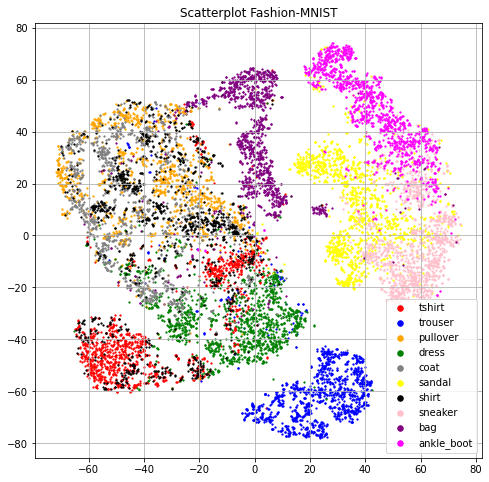

In [58]:
#3
%matplotlib inline
import matplotlib.pyplot as plt

t_shirt=[]
trouser=[]
pullover=[]
dress=[]
coat=[]
sandal=[]
shirt=[]
sneaker=[]
bag=[]
ankle_boot=[]

for i,x in enumerate(tsne_random_images):
    if random_labels[i] == 0:
        t_shirt.append(tsne_random_images[i])
    if random_labels[i] == 1:
        trouser.append(tsne_random_images[i])
    if random_labels[i] == 2:
        pullover.append(tsne_random_images[i])
    if random_labels[i] == 3:
        dress.append(tsne_random_images[i])
    if random_labels[i] == 4:
        coat.append(tsne_random_images[i])
    if random_labels[i] == 5:
        sandal.append(tsne_random_images[i])
    if random_labels[i] == 6:
        shirt.append(tsne_random_images[i])
    if random_labels[i] == 7:
        sneaker.append(tsne_random_images[i])
    if random_labels[i] == 8:
        bag.append(tsne_random_images[i])
    if random_labels[i] == 9:
        ankle_boot.append(tsne_random_images[i])

figur=plt.figure(figsize=(8,8))
ax = figur.subplots()
ax.scatter(*zip(*t_shirt), color="red", label="tshirt",s=1.5)
ax.scatter(*zip(*trouser), color="blue", label="trouser",s=1.5)
ax.scatter(*zip(*pullover), color="orange", label="pullover",s=1.5)
ax.scatter(*zip(*dress), color="green", label="dress",s=1.5)
ax.scatter(*zip(*coat), color="gray", label="coat",s=1.5)
ax.scatter(*zip(*sandal), color="yellow", label="sandal",s=1.5)
ax.scatter(*zip(*shirt), color="black", label="shirt",s=1.5)
ax.scatter(*zip(*sneaker), color="pink", label="sneaker",s=1.5)
ax.scatter(*zip(*bag), color="purple", label="bag",s=1.5)
ax.scatter(*zip(*ankle_boot), color="magenta", label="ankle_boot",s=1.5)

ax.set_title("Scatterplot Fashion-MNIST")
ax.grid(True)

legen = ax.legend()
for i in legen.legendHandles:
    i._sizes = [30]

figur.patch.set_alpha(1) 

plt.show()


In [59]:
#4  It is a good visual representation of the different 
# products but it is a little bit hard to read between same category labels

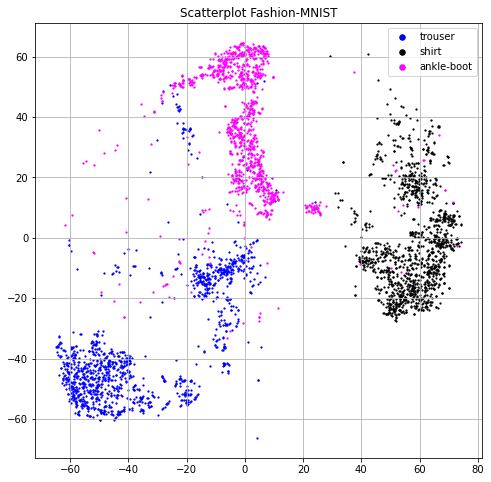

In [60]:
#5

figura = plt.figure(figsize=(8,8))
ax = figura.subplots()
ax.scatter(*zip(*t_shirt), color="blue", label="trouser",s=1.5)
ax.scatter(*zip(*sneaker), color="black", label="shirt",s=1.5)
ax.scatter(*zip(*bag), color="magenta", label="ankle-boot",s=1.5)

ax.set_title("Scatterplot Fashion-MNIST")
ax.grid(True)

# make all dots in the legend the same (bigger) size
legenda = ax.legend()
for i in legenda.legendHandles:
    i._sizes= [30]

figura.patch.set_alpha(1) # white border instead of tranparent

plt.show()

In [61]:
#6 It differentiates the different label 
# categories pretty good and is good visual representation